# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [15]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gaigeturi
Processing Record 2 of Set 1 | lethem
Processing Record 3 of Set 1 | shortandy
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | n'zeto
Processing Record 7 of Set 1 | colonia
Processing Record 8 of Set 1 | bilibino
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | tura
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | ararat
Processing Record 16 of Set 1 | margate
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | hadibu
Processing Record 22 of Set 1 | smithers
Processing Record 23 of Set 1 |

In [22]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gaigeturi,33.4644,126.3183,22.03,94,100,1.03,KR,1685410250
1,lethem,3.3803,-59.7968,25.79,84,100,1.65,GY,1685410251
2,shortandy,51.7006,70.9994,20.77,53,80,1.47,KZ,1685410252
3,wailua homesteads,22.0669,-159.3780,26.44,76,20,7.20,US,1685410252
4,ribeira grande,38.5167,-28.7000,15.99,86,16,4.02,PT,1685410253


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gaigeturi,33.4644,126.3183,22.03,94,100,1.03,KR,1685410250
1,lethem,3.3803,-59.7968,25.79,84,100,1.65,GY,1685410251
2,shortandy,51.7006,70.9994,20.77,53,80,1.47,KZ,1685410252
3,wailua homesteads,22.0669,-159.3780,26.44,76,20,7.20,US,1685410252
4,ribeira grande,38.5167,-28.7000,15.99,86,16,4.02,PT,1685410253


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

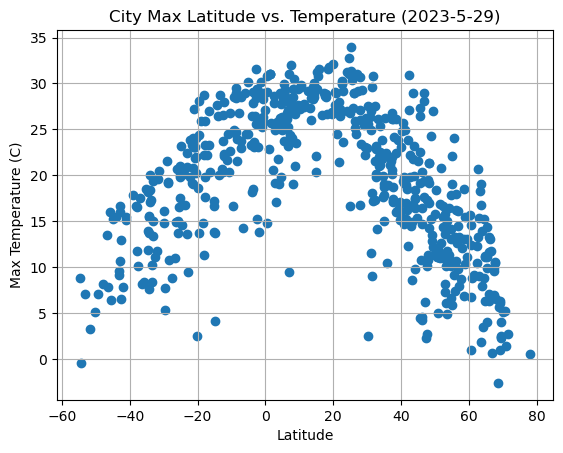

In [23]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude,temperature)

# Incorporate the other graph properties
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.title("City Max Latitude vs. Temperature (2023-5-29)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

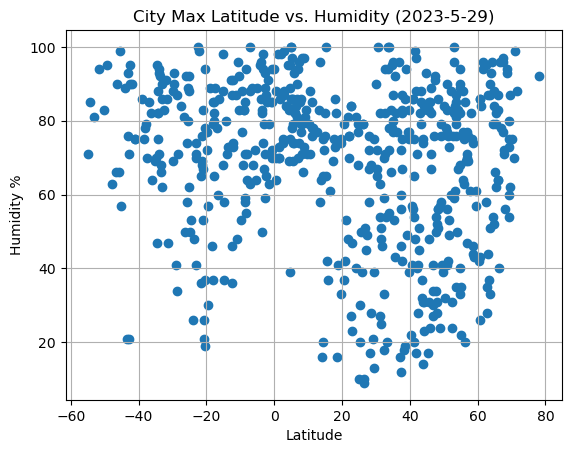

In [24]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Humidity"]
plt.scatter(latitude,humidity)


# Incorporate the other graph properties
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.title("City Max Latitude vs. Humidity (2023-5-29)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

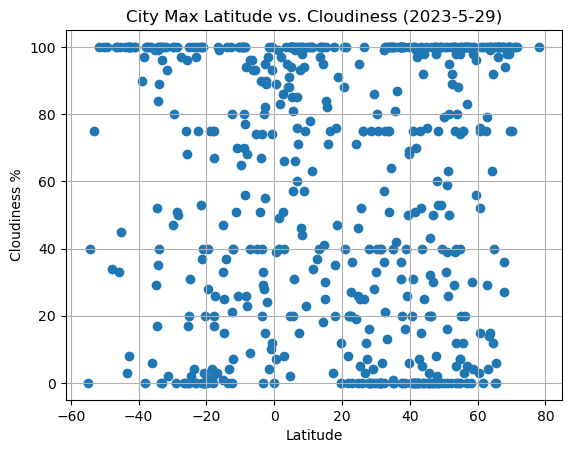

In [26]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude,cloudiness)

# Incorporate the other graph properties
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.title("City Max Latitude vs. Cloudiness (2023-5-29)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

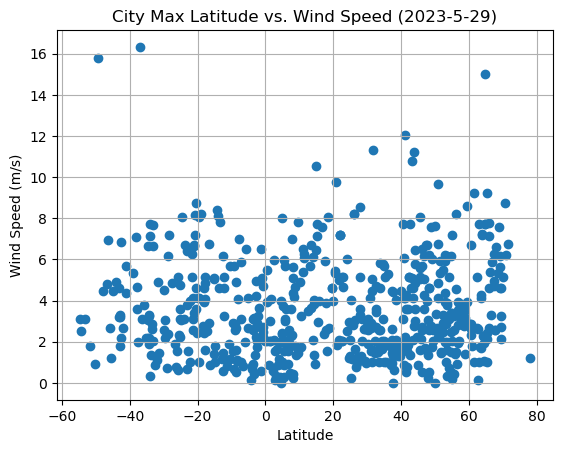

In [27]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude,wind_speed)
# Incorporate the other graph properties
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Max Latitude vs. Wind Speed (2023-5-29)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def regression_plot(x_values,y_values,x_label,y_label, hemi):
   (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
   regress_values = slope * x_values + intercept
   line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
   plt.scatter(x_values,y_values)
   plt.plot(x_values,regress_values,"r-")
   plt.annotate(line_eq,(0,0),fontsize=15,color="red",annotation_clip=False)
   plt.xlabel(x_label)
   plt.ylabel(y_label)
   plt.title(hemi + " City " + x_label + " vs " + y_label)
   print(f'The r-value is: {rvalue}')
   return plt.show()


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gaigeturi,33.4644,126.3183,22.03,94,100,1.03,KR,1685410250
1,lethem,3.3803,-59.7968,25.79,84,100,1.65,GY,1685410251
2,shortandy,51.7006,70.9994,20.77,53,80,1.47,KZ,1685410252
3,wailua homesteads,22.0669,-159.3780,26.44,76,20,7.20,US,1685410252
4,ribeira grande,38.5167,-28.7000,15.99,86,16,4.02,PT,1685410253


In [38]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
5,n'zeto,-7.2312,12.8666,22.95,88,96,3.13,AO,1685410254
8,waitangi,-43.9535,-176.5597,15.46,89,100,4.92,NZ,1685410257
9,avarua,-21.2078,-159.7750,24.03,69,100,4.12,CK,1685410258
10,margaret river,-33.9500,115.0667,20.08,71,89,7.16,AU,1685410259
11,hithadhoo,-0.6000,73.0833,28.32,70,74,2.73,MV,1685410260


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7763969773905922


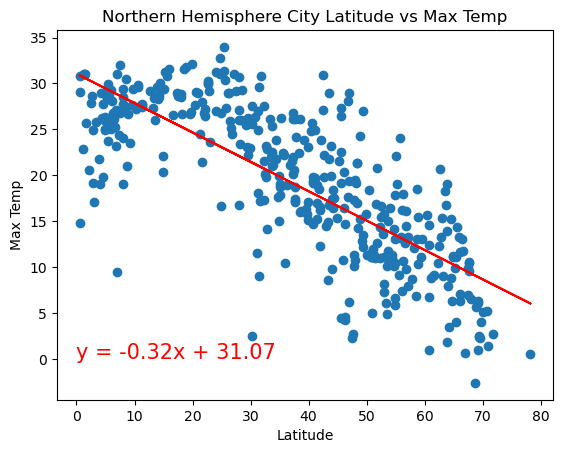

In [80]:
# Linear regression on Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Latitude","Max Temp", "Northern Hemisphere")


The r-value is: 0.748105394005147


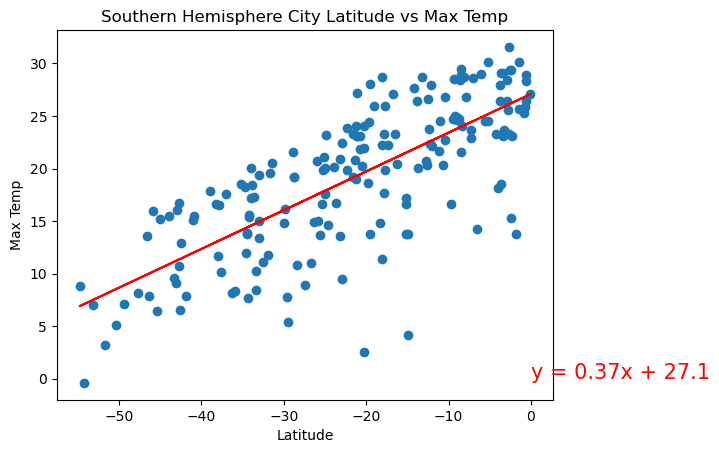

In [81]:
# Linear regression on Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Latitude","Max Temp", "Southern Hemisphere")

**Discussion about the linear relationship:**

There is a moderate negative correlation, r-value = 0.78, between max temperature and latitude in the northern hemisphere and a moderate positive correlation, r-value = 0.75, between max temperature and latitude for the southern hemisphere of all cities that were oberserved. These results insinuate that the closer the city is to latitude 0, the higher the temperature is likely to be.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.10625488498902087


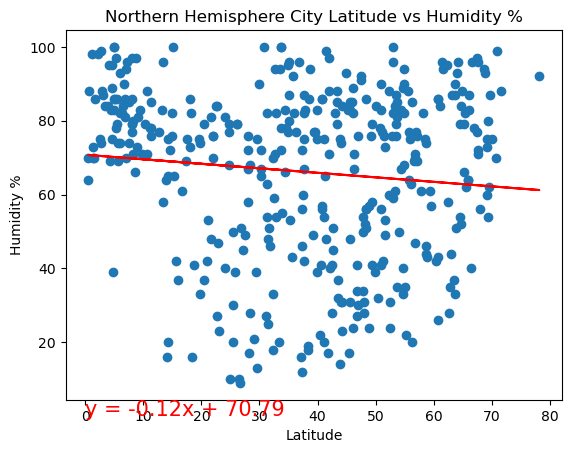

In [84]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Latitude","Humidity %", "Northern Hemisphere")


The r-value is: 0.021584706602939582


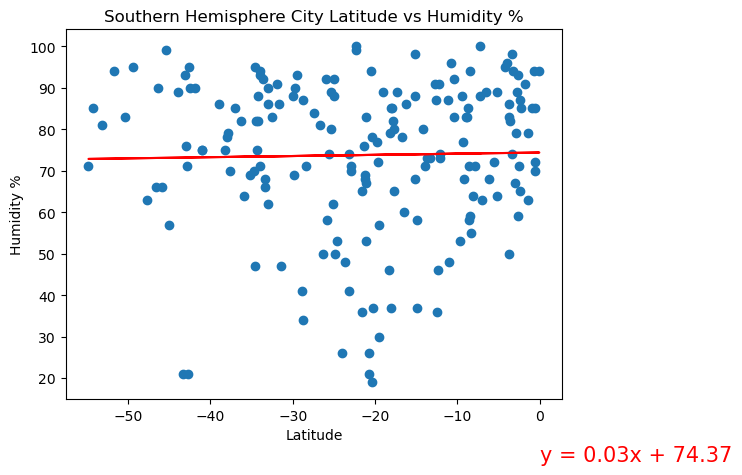

In [85]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Latitude","Humidity %", "Southern Hemisphere")

**Discussion about the linear relationship:** 

There is a low negative correlation , r-value = -0.11, between humidity level and latitude of observed cities in northern hemisphere and a low positive correlation, r-value = 0.02, between humidity level and latitude of observed cities in the southern hemisphere. These results show that there is no real effect on humidity by location.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.008425269392629898


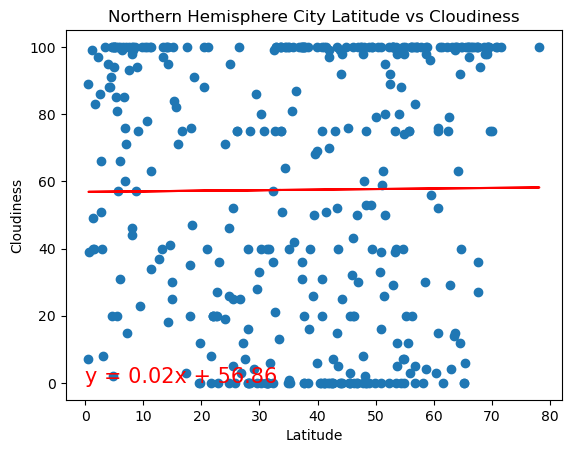

In [86]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Latitude","Cloudiness", "Northern Hemisphere")

The r-value is: -0.14593598720740888


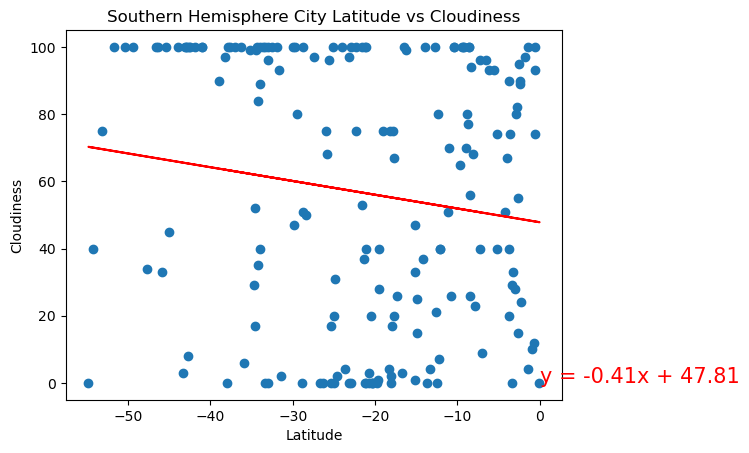

In [88]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Latitude","Cloudiness", "Southern Hemisphere")

**Discussion about the linear relationship:**

There is a very weak positive correlation, r-value = 0.008, between cloudiness and latitude of observed cities in the northern hemisphere and a  very weak negative correlation, r-value = -0.15, between cloudiness and latitude of cities observed in the southern hemisphere. These results indicate that latitude has almost no influence on the cloudiness of an area. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14215894162596737


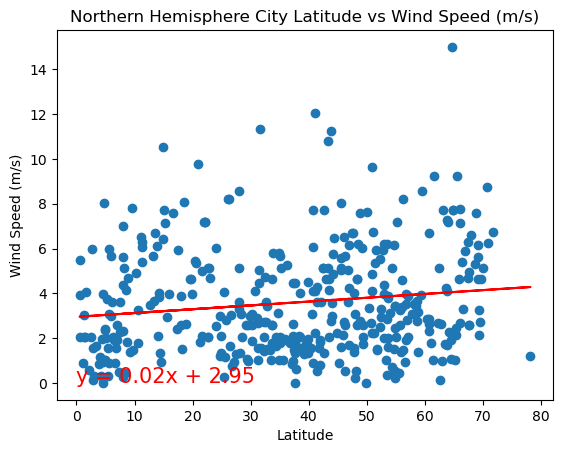

In [89]:
# Northern Hemisphere
regression_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)", "Northern Hemisphere")

The r-value is: -0.1790055180788054


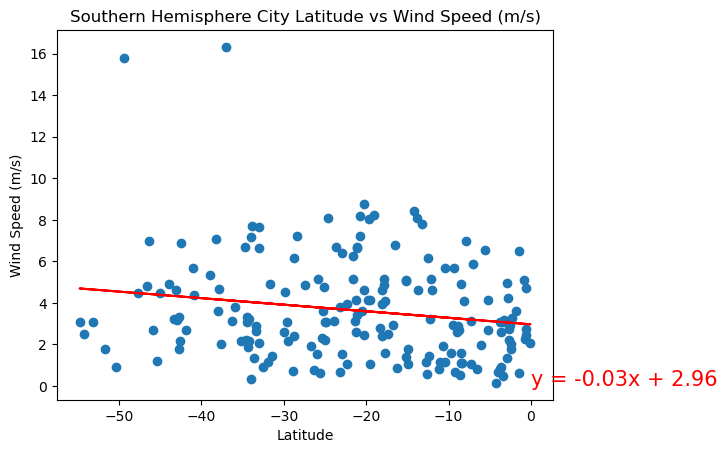

In [90]:
# Southern Hemisphere
regression_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Latitude","Wind Speed (m/s)", "Southern Hemisphere")

**Discussion about the linear relationship:** 

There is a very weak positive correlation, r-value= 0.14, between wind speed and latitude of cities observed from the northen hemisphere and a very weak negative correlation, r-value = 0.18, between wind speed and latitude of cities observed in the southern hemisphere. These results indicate that location has latitude has almost no effect on how windy a particular city will be compared to others within the same hemisphere. 